<h1 id='inicio'>Análise Churn - Alunos de Academia</h1>

Etapas:

[0 - Introdução de dados](#intro)  
[1 - Tratamento de dados](#tratamento)  
[2 - Limpeza de dados](#limpeza)  
[3 - Preparando dados para aplicar os modelos](#preparando)  
[4 - Aplicando e avaliando modelos](#modelos)  
[5 - Considerações finais e dump do modelo](#fim)

<h1 id="intro">0 - Introdução de dados</h1>

### Importando bibliotecas iniciais

In [3042]:
# para análise
import pandas as pd
from sqlalchemy import create_engine

# para conexão
import os
from urllib.parse import quote
from dotenv import load_dotenv
from sqlalchemy import create_engine

### Criando conexão com o banco de dados

In [3043]:
# carregando aquivo .env
load_dotenv()

usuario = os.getenv('POSTGRES_USER')
senha = quote(os.getenv('POSTGRES_PASSWORD'))
host = os.getenv('POSTGRES_HOST')
porta = os.getenv('POSTGRES_PORT')
banco = os.getenv('POSTGRES_DB')

engine = create_engine(f'postgresql+psycopg2://{usuario}:{senha}@{host}:{porta}/{banco}')

### Visualizando dados

In [3044]:
# importando base de dados alunos
base_alunos = pd.read_sql("SELECT * FROM alunos", con=engine)
display(base_alunos)

,id,nome,sexo,email,senha,ativo,data_nascimento,plano_id,data_cadastro
0,1,Maria Isis Gonçalves,Feminino,silvabeatriz@example.net,$2b$12$dBI9zvImisX79iAuV2ecUuUsKgOsNrctrLCF0Ob...,True,1984-06-04,1,2025-06-23 03:35:13.894937+00:00
1,2,Rebeca Cirino,Feminino,barrosluiz-otavio@example.com,$2b$12$18PQtRqCTX1bZw9je/4xzOFkYT.mO6ibdjstASU...,True,1997-10-30,1,2025-06-23 03:35:14.166553+00:00
2,3,Melissa Campos,Feminino,benicioviana@example.net,$2b$12$FjamLZgEPcYsLMdMHfnxRuwp2lH8srhIVd3O9EB...,True,1999-04-27,1,2025-06-23 03:35:14.437300+00:00
3,4,Letícia Ribeiro,Feminino,yuri85@example.com,$2b$12$wYSuERRIC29AFuAwgz1bJuFZDJJTZ65K.XvEcn3...,True,1982-04-11,1,2025-06-23 03:35:14.700603+00:00
4,5,Melina Novais,Feminino,arthur-gabriel86@example.net,$2b$12$MbcKKBpvo4xTiJqZ6nKmD.l8d51h6G7AHFPE6TU...,True,1964-04-28,1,2025-06-23 03:35:14.964289+00:00
...,...,...,...,...,...,...,...,...,...
995,996,Antônio Ferreira,Masculino,ravy77@example.com,$2b$12$JxNRA6PW/onaY3lvUCkmZ.3cblevkGyRFHs13.L...,True,2006-05-29,4,2025-06-23 03:39:59.348631+00:00
996,997,Lorenzo Monteiro,Masculino,joao-miguel00@example.com,$2b$12$cN2PjvhUWiXKi6jvH2IqTOkCOEpp1DAeNQACCK/...,True,1990-10-12,4,2025-06-23 03:39:59.648886+00:00
997,998,Julia Araújo,Feminino,cecilia60@example.net,$2b$12$nd9ceLfgo9jyKW95I4LuXu2SP6yWiQUNAcRzWBD...,True,1986-12-27,4,2025-06-23 03:39:59.966119+00:00
998,999,Calebe das Neves,Masculino,mendoncamarcela@example.net,$2b$12$DZpYP5pJcp7na7GzEJc6SO2SM0FwzeDllvl0HpO...,True,1974-11-09,4,2025-06-23 03:40:00.317314+00:00


In [3045]:
# importando base de dados checkins
base_checkins = pd.read_sql("SELECT * FROM checkins", con=engine)
display(base_checkins)

,id,aluno_id,data,hora
0,1,1,2025-05-31,2025-05-31 07:00:00+00:00
1,2,1,2025-06-01,2025-06-01 07:00:00+00:00
2,3,1,2025-06-03,2025-06-03 07:00:00+00:00
3,4,1,2025-06-06,2025-06-06 07:00:00+00:00
4,5,1,2025-06-15,2025-06-15 07:00:00+00:00
...,...,...,...,...
8423,8424,1000,2025-04-19,2025-04-19 07:00:00+00:00
8424,8425,1000,2025-04-20,2025-04-20 07:00:00+00:00
8425,8426,1000,2025-04-26,2025-04-26 07:00:00+00:00
8426,8427,1000,2025-05-02,2025-05-02 07:00:00+00:00


In [3046]:
# imprtando base de dados planos
base_planos = pd.read_sql("SELECT * FROM planos", con=engine)
display(base_planos)

,id,nome,duracao_meses,preco
0,1,Mensal,1,100.0
1,2,Trimestral,3,270.0
2,3,Semestral,6,480.0
3,4,Anual,12,900.0


### Verificando consistência das bases


<small>Obs: Não há dados vazios, não tive tempo de otimizar o faker para gerar iconsistências, então não vou demorar tanto na parte de exploração e tratamento, consigo demonstrar melhor minhas habilidades nessa parte em um projeto pessoal do kaggle que eu fiz, mas se houvessem dados vazios eu faria as seguintes coisas:</small>  

<small>- Se houvessem valores de idade (data de nascimento) vazios, por exemplo, eu substituiria eles pela média de todas as idades</small>

<small>- Se tivessem muitos outliers em determinada coluna, muito provavelmente eu usaria a mediana para substituir os valores vazio, já que a média não representaria bem a distribuição de dados</small>

<small>- De forma geral já é feito um pré tratamento no meu banco de dados para evitar dados inconsistentes. O que poderia criar um problema são alunos inativos, mas emboram não tenha nenhum no banco, se houvesse eu excluiria no tratamento de qualquer forma</small>

In [3047]:
# conferindo alunos
base_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               1000 non-null   int64              
 1   nome             1000 non-null   object             
 2   sexo             1000 non-null   object             
 3   email            1000 non-null   object             
 4   senha            1000 non-null   object             
 5   ativo            1000 non-null   bool               
 6   data_nascimento  1000 non-null   object             
 7   plano_id         1000 non-null   int64              
 8   data_cadastro    1000 non-null   datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 63.6+ KB


In [3048]:
# verificando se existe algum cadastro inativo
base_alunos.ativo.value_counts()

ativo
True    1000
Name: count, dtype: int64

In [3049]:
# conferindo checkins
base_checkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8428 entries, 0 to 8427
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   id        8428 non-null   int64              
 1   aluno_id  8428 non-null   int64              
 2   data      8428 non-null   object             
 3   hora      8428 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(2), object(1)
memory usage: 263.5+ KB


In [3050]:
# conferindo planos
base_planos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4 non-null      int64  
 1   nome           4 non-null      object 
 2   duracao_meses  4 non-null      int64  
 3   preco          4 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 260.0+ bytes


<h1 id='tratamento'>1 - Tratamento de dados</h1>

<small>Obs:</small>  
<small>- A partir daqui eu já desconsiderei a base_planos. Ela é muito relevante para a análise mas já está inclusa na base_alunos na coluna plano_id, com isso eu já tenho o necessário dela.</small> 

<small>- Eu poderia ter usado o nome do plano ao invés do id, aumentaria o desafio. Mas se fosse o caso, eu usaria o OneHotEncoder do Pandas (get.dummies) ou do Scikit-Learn para tranformar em dados Booleanos numéricos</small>

Transformando gênero em booleano (base_alunos)

In [3051]:
# analisando distribuição de gênero
base_alunos.sexo.value_counts()

sexo
Masculino    503
Feminino     497
Name: count, dtype: int64

In [3052]:
# criando nova coluna IsMale
base_alunos['IsMale'] = base_alunos.sexo.apply(lambda x:1 if x == 'Masculino' else 0)

In [3053]:
# verificando nova coluna
base_alunos.groupby(['sexo', 'IsMale'])['sexo'].count()

sexo       IsMale
Feminino   0         497
Masculino  1         503
Name: sexo, dtype: int64

Tranformando data de nascimento em idade (base_alunos)

In [3054]:
# visualizando formato dos dados
base_alunos['data_nascimento'].head(1)

0    1984-06-04
Name: data_nascimento, dtype: object

In [3055]:
# criando coluna Idade
from datetime import datetime

base_alunos['data_nascimento'] = pd.to_datetime(base_alunos['data_nascimento'])

# calcula a idade sem superestimar
hoje = pd.to_datetime(datetime.now().date())
base_alunos['Idade'] = base_alunos['data_nascimento'].apply(
    lambda nascimento: hoje.year - nascimento.year - ((hoje.month, hoje.day) < (nascimento.month, nascimento.day))
)

In [3056]:
# verificando nova coluna
base_alunos.groupby(['data_nascimento', 'Idade'])['data_nascimento'].count()

data_nascimento  Idade
1959-06-24       65       1
1959-07-10       65       1
1959-08-01       65       1
1959-08-07       65       1
1959-08-23       65       1
                         ..
2007-04-16       18       1
2007-05-06       18       2
2007-05-22       18       1
2007-06-10       18       1
2007-06-14       18       1
Name: data_nascimento, Length: 974, dtype: int64

Transformando data em dias sem checkin (base_checkins)

In [3057]:
# criando dataframe com coluna DiasSemCheckin

# garantindo formato data
base_checkins['data'] = pd.to_datetime(base_checkins['data'])

# calculando último checkin
ultimo_checkin = base_checkins.groupby('aluno_id')['data'].max().reset_index()
ultimo_checkin.rename(columns={'data': 'data_ultimo_checkin'}, inplace=True)

# data atual
hoje = pd.to_datetime(datetime.now().date())

# calculando dias sem checkin
hoje = pd.to_datetime(datetime.now().date())
ultimo_checkin['DiasSemCheckin'] = (hoje - ultimo_checkin['data_ultimo_checkin']).dt.days

# conferindo resultado
display(ultimo_checkin)

,aluno_id,data_ultimo_checkin,DiasSemCheckin
0,1,2025-06-19,4
1,2,2025-06-23,0
2,3,2025-05-31,23
3,4,2025-04-24,60
4,5,2025-06-19,4
...,...,...,...
995,996,2025-06-23,0
996,997,2025-06-23,0
997,998,2025-06-23,0
998,999,2025-06-15,8


In [3058]:
# atribuindo à base_checkins
base_ultimo_checkin = ultimo_checkin

In [3059]:
# unindo as bases
base = pd.merge(base_alunos, base_ultimo_checkin, left_on='id', right_on='aluno_id', how='left')

# excluindo coluna duplicada
base.drop(columns=['aluno_id'], inplace=True)

# conferindo resultado
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   1000 non-null   int64              
 1   nome                 1000 non-null   object             
 2   sexo                 1000 non-null   object             
 3   email                1000 non-null   object             
 4   senha                1000 non-null   object             
 5   ativo                1000 non-null   bool               
 6   data_nascimento      1000 non-null   datetime64[ns]     
 7   plano_id             1000 non-null   int64              
 8   data_cadastro        1000 non-null   datetime64[ns, UTC]
 9   IsMale               1000 non-null   int64              
 10  Idade                1000 non-null   int64              
 11  data_ultimo_checkin  1000 non-null   datetime64[ns]     
 12  DiasSemCheckin       

<h1 id='limpeza'>2 - Limpeza de dados</h1>

---
CORREÇÃO: Criando novas features

<small>
Motivo:

Criei DiasSemCheckin mas com ela o modelo não aprende nada, só decora. Usar dados muito ligados ao É_Churn causa a mesma coisa.
</small>

In [3060]:
# total de checkins por aluno
total_checkins = base_checkins.groupby('aluno_id').size().reset_index(name='TotalCheckins')

# filtrar checkins dos últimos 30 dias
checkins_30 = base_checkins[base_checkins['data'] >= (hoje - pd.Timedelta(days=30))]
checkins_30d = checkins_30.groupby('aluno_id').size().reset_index(name='CheckinsUltimos30Dias')

# filtrar checkins dos últimos 90 dias
checkins_90 = base_checkins[base_checkins['data'] >= (hoje - pd.Timedelta(days=90))]
checkins_90d = checkins_90.groupby('aluno_id').size().reset_index(name='CheckinsUltimos90Dias')

# média semanal de checkins nos últimos 90 dias
checkins_90d['MediaSemanalCheckin_90d'] = checkins_90d['CheckinsUltimos90Dias'] / (90 / 7)

# calculando intervalo médio e desvio padrão entre check-ins por aluno
df_sorted = base_checkins.sort_values(['aluno_id', 'data']).copy()
df_sorted['intervalo'] = df_sorted.groupby('aluno_id')['data'].diff().dt.days

media_intervalo = df_sorted.groupby('aluno_id')['intervalo'].mean().reset_index(name='TempoMedioEntreCheckins')
desvio_intervalo = df_sorted.groupby('aluno_id')['intervalo'].std().reset_index(name='DesvioDiasEntreCheckins')

# unindo todas as métricas num único dataframe por aluno
df_metrics = total_checkins \
    .merge(checkins_30d, on='aluno_id', how='left') \
    .merge(checkins_90d[['aluno_id', 'CheckinsUltimos90Dias', 'MediaSemanalCheckin_90d']], on='aluno_id', how='left') \
    .merge(media_intervalo, on='aluno_id', how='left') \
    .merge(desvio_intervalo, on='aluno_id', how='left')

# preenchendo NaN com 0 para alunos com poucos checkins
df_metrics.fillna(0, inplace=True)

# unindo as métricas na base principal pelo id do aluno
base = base.merge(df_metrics, left_on='id', right_on='aluno_id', how='left')

# removendo coluna auxiliar
base.drop(columns=['aluno_id'], inplace=True)

---

In [3061]:
# eliminado colunas tipo object
base = base.drop(columns=base_alunos.select_dtypes(include='object').columns)
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       1000 non-null   int64              
 1   ativo                    1000 non-null   bool               
 2   data_nascimento          1000 non-null   datetime64[ns]     
 3   plano_id                 1000 non-null   int64              
 4   data_cadastro            1000 non-null   datetime64[ns, UTC]
 5   IsMale                   1000 non-null   int64              
 6   Idade                    1000 non-null   int64              
 7   data_ultimo_checkin      1000 non-null   datetime64[ns]     
 8   DiasSemCheckin           1000 non-null   int64              
 9   TotalCheckins            1000 non-null   int64              
 10  CheckinsUltimos30Dias    1000 non-null   float64            
 11  CheckinsUltimos90Dias    1000 n

In [3062]:
# Eliminando colunas desnecessárias (id, ativo, data_nascimento e data_cadastro)
# Devido a uma correção abaixo, o id eu vou deixar para tirar depois
base = base.drop(['ativo', 'data_nascimento', 'data_cadastro', 'data_ultimo_checkin'], axis=1)
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1000 non-null   int64  
 1   plano_id                 1000 non-null   int64  
 2   IsMale                   1000 non-null   int64  
 3   Idade                    1000 non-null   int64  
 4   DiasSemCheckin           1000 non-null   int64  
 5   TotalCheckins            1000 non-null   int64  
 6   CheckinsUltimos30Dias    1000 non-null   float64
 7   CheckinsUltimos90Dias    1000 non-null   int64  
 8   MediaSemanalCheckin_90d  1000 non-null   float64
 9   TempoMedioEntreCheckins  1000 non-null   float64
 10  DesvioDiasEntreCheckins  1000 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 86.1 KB


<h1 id='preparando'>3 - Preparando dados para aplicar os modelos</h1>

<small>Obs - Explicando decisões recentes:</small>  
<small>- Retirei as colunas do tipo object porque nome, email e senha não são relevantes para o modelo nesse contexto.</small>  

<small>- Retirei a coluna id por ser um identificador. Manter ela iria afetar muito a cardinalidade e correlação dos dados</small> 

<small>- Retirei a coluna ativo pois todos os dados são iguais, não é relevante nesse caso.</small> 

<small>- Retirei a coluna data_nascimento pois já criei a coluna idade.</small> 

<small>- Retirei a coluna data_ultimo_checkin pois está no formato de data e eu já tenho a coluna DiasSemCheckin.</small> 

<small>- Por fim, retirei a coluna data_cadastro pois fiz todos na mesma data, se fossem cadastros ao longo do ano até poderia ser feita uma análise mais completa considerando as épocas do ano, eventos, estações e datas comemorativas, por exemplo.</small> 

In [3063]:
# criando coluna É_Churn
base['É_Churn'] = base.DiasSemCheckin >= 30

# Transfomando bool em binário
base['É_Churn'] = base['É_Churn'].astype(int)

# base atual
display(base)

,id,plano_id,IsMale,Idade,DiasSemCheckin,TotalCheckins,CheckinsUltimos30Dias,CheckinsUltimos90Dias,MediaSemanalCheckin_90d,TempoMedioEntreCheckins,DesvioDiasEntreCheckins,É_Churn
0,1,1,0,41,4,7,7.0,7,0.544444,3.166667,2.994439,0
1,2,1,0,27,0,7,7.0,7,0.544444,4.166667,3.125167,0
2,3,1,0,26,23,6,1.0,6,0.466667,4.200000,3.701351,0
3,4,1,0,43,60,6,0.0,6,0.466667,5.600000,3.781534,1
4,5,1,0,61,4,7,7.0,7,0.544444,3.500000,3.507136,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,4,1,19,0,12,12.0,12,0.933333,2.454545,1.572491,0
996,997,4,1,34,0,13,13.0,13,1.011111,2.250000,1.484771,0
997,998,4,0,38,0,12,12.0,12,0.933333,2.454545,1.439697,0
998,999,4,1,50,8,10,8.0,10,0.777778,3.222222,1.481366,0


<Axes: >

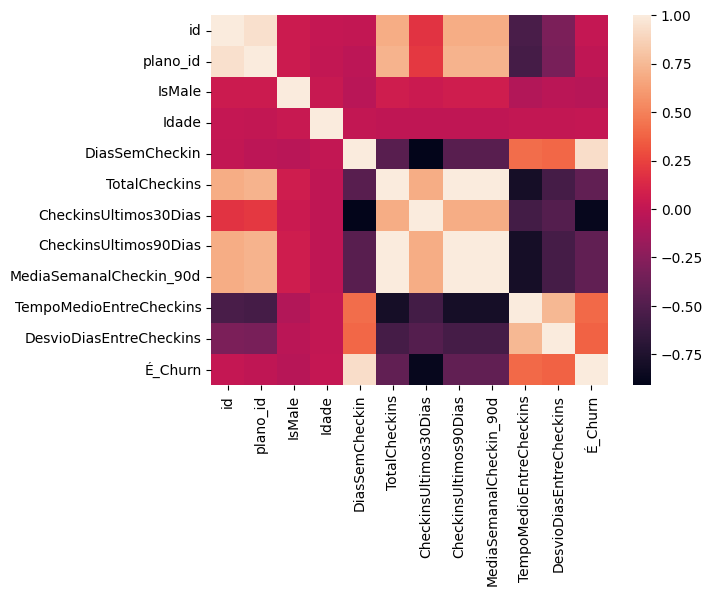

In [3064]:
# verificando heatmap da base
sns.heatmap(base.corr(numeric_only=True))

In [3065]:
print(base['É_Churn'].value_counts(normalize=True))

É_Churn
0    0.615
1    0.385
Name: proportion, dtype: float64


Preparações finais para o modelo

In [3066]:
# separando X e y
X = base.drop(columns=['id', 'É_Churn', 'DiasSemCheckin', 'CheckinsUltimos30Dias'])
y = base['É_Churn']

In [3067]:
# separando em treino e teste (scaled e notScaled)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# notScaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# scaled
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

<h1 id='modelos'>4 - Aplicando e avaliando modelos</h1>

<small>Obs - Explicando decisões recentes:</small>  
<small>- Separei X_train e X_test escalados e não escalados porque vou usar alguns modelos (ou somente regressão logística) que tem melhores resultados com dados escalados</small>  

Iportação e configuração dos modelos

In [3068]:
# importando e configurando modelos (xgb)
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss', random_state=42, max_depth=6, n_estimators=100)

# random forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# árvore de decisão
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier(random_state=42)

# regressão logística
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression(max_iter=1000, random_state=42)

# svm
from sklearn.svm import SVC
svc = SVC(random_state=42, kernel='rbf')

# knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

Fit dos modelos

In [3069]:
# xgb
xgb = xgb.fit(X_train, y_train)

# random forest
random_forest = random_forest.fit(X_train, y_train)

# árvore de decisão
arvore = arvore.fit(X_train, y_train)

# regressão logística
log_regression = log_regression.fit(X_train_scaled, y_train)

# svm
svc = svc.fit(X_train_scaled, y_train)

# knn
knn = knn.fit(X_train_scaled, y_train)

Previsão dos modelos

In [3070]:
# xgb
pred_xgb = xgb.predict(X_test)

# random forest
pred_rforest = random_forest.predict(X_test)

# árvore de decisão
pred_arvore = arvore.predict(X_test)

# regressão logística
pred_log = log_regression.predict(X_test_scaled)

# svm
pred_svc = svc.predict(X_test_scaled)

# knn
pred_knn = knn.predict(X_test_scaled)

Avaliando modelos

In [3071]:
# importando métricas de avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [3072]:
# acurácia
print(accuracy_score(y_test, pred_xgb))
print(accuracy_score(y_test, pred_rforest))
print(accuracy_score(y_test, pred_arvore))
print(accuracy_score(y_test, pred_log))
print(accuracy_score(y_test, pred_svc))
print(accuracy_score(y_test, pred_knn))

0.795
0.845
0.8
0.79
0.82
0.785


In [3073]:
# precisão
print(precision_score(y_test, pred_xgb))
print(precision_score(y_test, pred_rforest))
print(precision_score(y_test, pred_arvore))
print(precision_score(y_test, pred_log))
print(precision_score(y_test, pred_svc))
print(precision_score(y_test, pred_knn))

0.7307692307692307
0.7948717948717948
0.7681159420289855
0.7536231884057971
0.7662337662337663
0.7236842105263158


In [3074]:
# recall
print(recall_score(y_test, pred_xgb))
print(recall_score(y_test, pred_rforest))
print(recall_score(y_test, pred_arvore))
print(recall_score(y_test, pred_log))
print(recall_score(y_test, pred_svc))
print(recall_score(y_test, pred_knn))

0.7402597402597403
0.8051948051948052
0.6883116883116883
0.6753246753246753
0.7662337662337663
0.7142857142857143


In [3075]:
# f1
print(f1_score(y_test, pred_xgb))
print(f1_score(y_test, pred_rforest))
print(f1_score(y_test, pred_arvore))
print(f1_score(y_test, pred_log))
print(f1_score(y_test, pred_svc))
print(f1_score(y_test, pred_knn))

0.7354838709677419
0.8
0.726027397260274
0.7123287671232876
0.7662337662337663
0.7189542483660131


In [3076]:
# matriz de confusão
print(confusion_matrix(y_test, pred_xgb))
print(confusion_matrix(y_test, pred_rforest))
print(confusion_matrix(y_test, pred_arvore))
print(confusion_matrix(y_test, pred_log))
print(confusion_matrix(y_test, pred_svc))
print(confusion_matrix(y_test, pred_knn))

[[102  21]
 [ 20  57]]
[[107  16]
 [ 15  62]]
[[107  16]
 [ 24  53]]
[[106  17]
 [ 25  52]]
[[105  18]
 [ 18  59]]
[[102  21]
 [ 22  55]]


In [3077]:
# ROC-AUC
print(roc_auc_score(y_test, pred_xgb))
print(roc_auc_score(y_test, pred_rforest))
print(roc_auc_score(y_test, pred_arvore))
print(roc_auc_score(y_test, pred_log))
print(roc_auc_score(y_test, pred_svc))
print(roc_auc_score(y_test, pred_knn))

0.7847640164713335
0.8375567521908985
0.77911519374934
0.7685566466054271
0.809946151409566
0.7717770034843207


<h1 id='fim'>5 - Considerações finais</h1>

Comparei os dados no Excel para visualizar melhor, quem ganhou foi o modelo Random Forest com média de 81.65% nos resultados das métricas.

[Análise Churn - Alunos de Academia](#inicio)

Dumping do modelo

In [3078]:
import joblib

caminho = os.path.join('..', 'app', 'modelo_churn.pkl')
joblib.dump(random_forest, caminho)

['..\\app\\modelo_churn.pkl']